## **Import libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data preparation**

In [11]:
df = pd.read_csv('data/Global_Education.csv')

* Countries and Areas: Name of the countries and areas.
* Latitude: Latitude coordinates of the geographical location.
* Longitude: Longitude coordinates of the geographical location.
* OOSR_Pre0Primary_Age_Male: Out-of-school rate for pre-primary age males.
* OOSR_Pre0Primary_Age_Female: Out-of-school rate for pre-primary age females.
* OOSR_Primary_Age_Male: Out-of-school rate for primary age males.
* OOSR_Primary_Age_Female: Out-of-school rate for primary age females.
* OOSR_Lower_Secondary_Age_Male: Out-of-school rate for lower secondary age males.
* OOSR_Lower_Secondary_Age_Female: Out-of-school rate for lower secondary age females.
* OOSR_Upper_Secondary_Age_Male: Out-of-school rate for upper secondary age males.
* OOSR_Upper_Secondary_Age_Female: Out-of-school rate for upper secondary age females.
* Completion_Rate_Primary_Male: Completion rate for primary education among males.
* Completion_Rate_Primary_Female: Completion rate for primary education among females.
* Completion_Rate_Lower_Secondary_Male: Completion rate for lower secondary education among males.
* Completion_Rate_Lower_Secondary_Female: Completion rate for lower secondary education among females.
* Completion_Rate_Upper_Secondary_Male: Completion rate for upper secondary education among males.
* Completion_Rate_Upper_Secondary_Female: Completion rate for upper secondary education among females.
* Grade_2_3_Proficiency_Reading: Proficiency in reading for grade 2-3 students.
* Grade_2_3_Proficiency_Math: Proficiency in math for grade 2-3 students.
* Primary_End_Proficiency_Reading: Proficiency in reading at the end of primary education.
* Primary_End_Proficiency_Math: Proficiency in math at the end of primary education.
* Lower_Secondary_End_Proficiency_Reading: Proficiency in reading at the end of lower secondary education.
* Lower_Secondary_End_Proficiency_Math: Proficiency in math at the end of lower secondary education.
* Youth_15_24_Literacy_Rate_Male: Literacy rate among male youths aged 15-24.
* Youth_15_24_Literacy_Rate_Female: Literacy rate among female youths aged 15-24.
* Birth_Rate: Birth rate in the respective countries/areas.
* Gross_Primary_Education_Enrollment: Gross enrollment in primary education.
* Gross_Tertiary_Education_Enrollment: Gross enrollment in tertiary education.
* Unemployment_Rate: Unemployment rate in the respective countries/areas.

## **Change the name of some columns**

In [12]:
df.rename(columns={'Countries and areas': 'Countries'}, inplace=True)

# **What are the differences in education completion rates between genders across different countries?**

## Filter new dataframe that contains completion rate only

In [13]:
df_complettion = df[['Countries','Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female']]

## **Mapping contries to suitable continents**

In [84]:
import pycountry_convert as pc
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None
df_complettion['Continent'] = df_complettion['Countries'].apply(country_to_continent);

C:\Users\PCPV\AppData\Local\Temp\ipykernel_4480\756860113.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complettion['Continent'] = df_complettion['Countries'].apply(country_to_continent);


## **Completion rate group by continents**

In [16]:
continents = df_complettion.groupby('Continent').agg({
    'Completion_Rate_Primary_Male': 'mean',
    'Completion_Rate_Primary_Female': 'mean',
    'Completion_Rate_Lower_Secondary_Male': 'mean',
    'Completion_Rate_Lower_Secondary_Female': 'mean',
    'Completion_Rate_Upper_Secondary_Male': 'mean',
    'Completion_Rate_Upper_Secondary_Female': 'mean',
}).reset_index()

## **Male Education Completion Rate VS Female Education Completion Rate in Primary School**

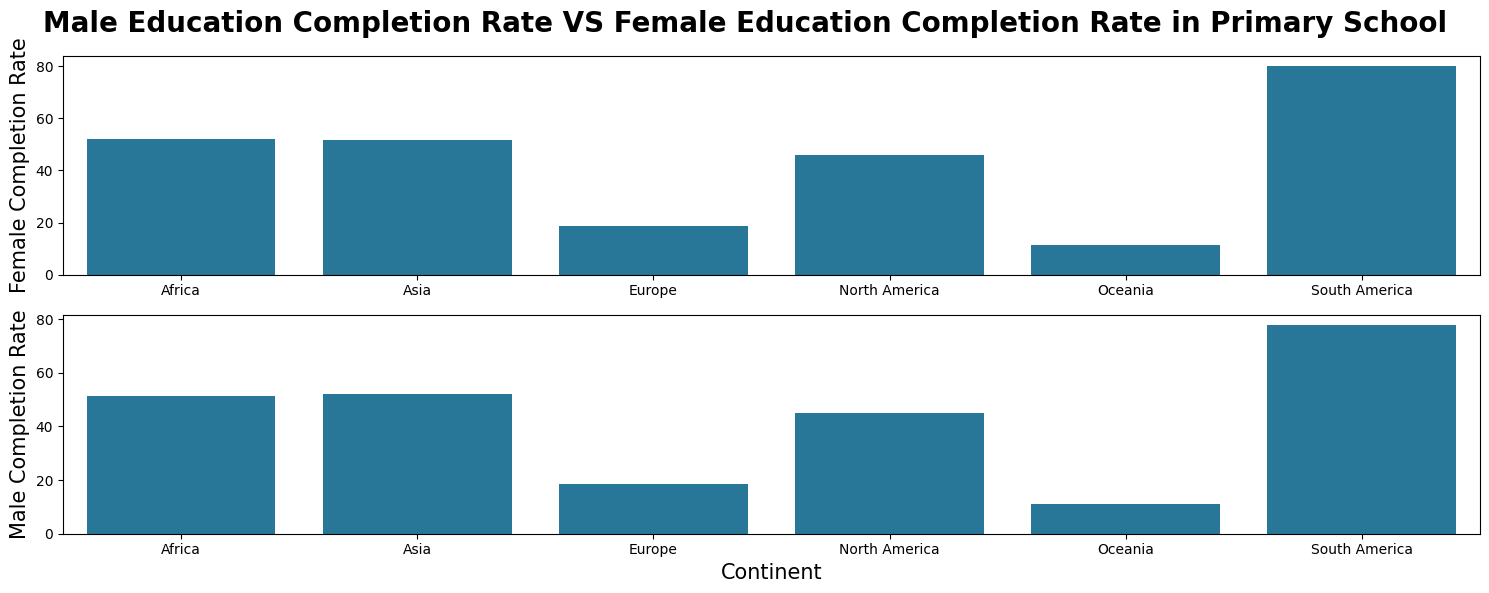

In [17]:
fig, ax = plt.subplots(2,1,figsize=(15,6))
plt.suptitle('Male Education Completion Rate VS Female Education Completion Rate in Primary School', fontweight = '600', fontsize = 20)
sns.barplot(continents, x='Continent', y='Completion_Rate_Primary_Female', ax=ax[0], color='#177EAA')
ax[0].set_ylabel('Female Completion Rate',  fontweight = '500', fontsize = 15)
ax[0].set_xlabel('')
sns.barplot(continents, x='Continent', y='Completion_Rate_Primary_Male', ax=ax[1], color='#177EAA')
ax[1].set_ylabel('Male Completion Rate',  fontweight = '500', fontsize = 15)
ax[1].set_xlabel('Continent',  fontweight = '500', fontsize = 15)
plt.tight_layout()

## **Male Education Completion Rate VS Female Education Completion Rate in Lower Seconary School**

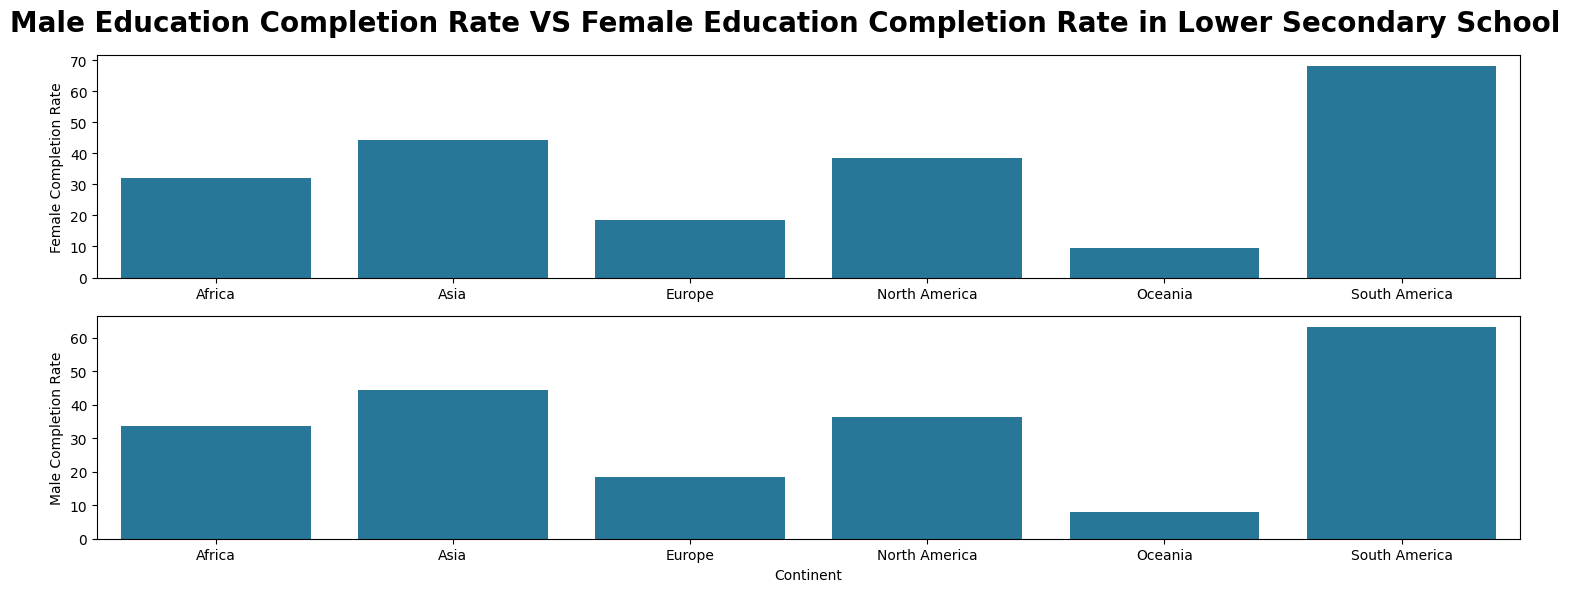

In [86]:
fig, ax = plt.subplots(2,1,figsize=(15,6))
plt.suptitle('Male Education Completion Rate VS Female Education Completion Rate in Lower Secondary School', fontweight = '600', fontsize = 20)
sns.barplot(continents, x='Continent', y='Completion_Rate_Lower_Secondary_Female', ax=ax[0], color='#177EAA')
ax[0].set_ylabel('Female Completion Rate')
ax[0].set_xlabel('')
sns.barplot(continents, x='Continent', y='Completion_Rate_Lower_Secondary_Male', ax=ax[1], color='#177EAA')
ax[1].set_ylabel('Male Completion Rate')
plt.tight_layout()

## **Male Education Completion Rate VS Female Education Completion Rate in Upper Seconary School**

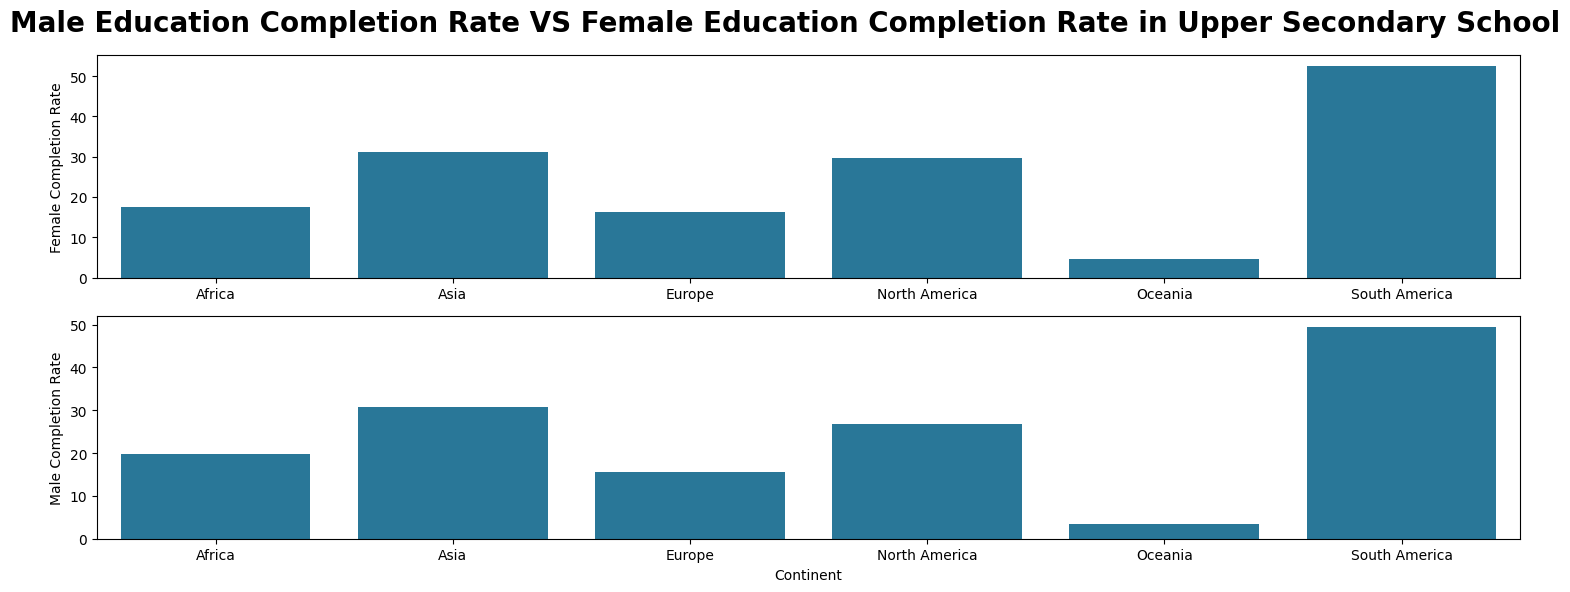

In [87]:
fig, ax = plt.subplots(2,1,figsize=(15,6))
plt.suptitle('Male Education Completion Rate VS Female Education Completion Rate in Upper Secondary School', fontweight = '600', fontsize = 20)
sns.barplot(continents, x='Continent', y='Completion_Rate_Upper_Secondary_Female', ax=ax[0], color='#177EAA')
ax[0].set_ylabel('Female Completion Rate')
ax[0].set_xlabel('')
sns.barplot(continents, x='Continent', y='Completion_Rate_Upper_Secondary_Male', ax=ax[1], color='#177EAA')
ax[1].set_ylabel('Male Completion Rate')
plt.tight_layout()

# **What is the relationship between birth rates and education completion rates?**

## **Filter dataframe to birth rate and conpletion rate only**

In [20]:
df_birthrate_completion = df[['Countries','Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
        'Birth_Rate']]

## **Find the completion rate in each countries**

In [88]:
df_birthrate_completion['Completion_Rate'] = (
                                              df_birthrate_completion['Completion_Rate_Primary_Male'] +
                                              df_birthrate_completion['Completion_Rate_Primary_Female'] +
                                              df_birthrate_completion['Completion_Rate_Lower_Secondary_Male'] +
                                              df_birthrate_completion['Completion_Rate_Lower_Secondary_Female'] +
                                              df_birthrate_completion['Completion_Rate_Upper_Secondary_Male'] +
                                               df_birthrate_completion['Completion_Rate_Upper_Secondary_Female']
                                              ) / 6

# Filter data frame by removing  completion rate  = 0
df_birthrate_completion = df_birthrate_completion[df_birthrate_completion['Completion_Rate'] != 0];

## **Distribution between birth rate and completion rate across countires**

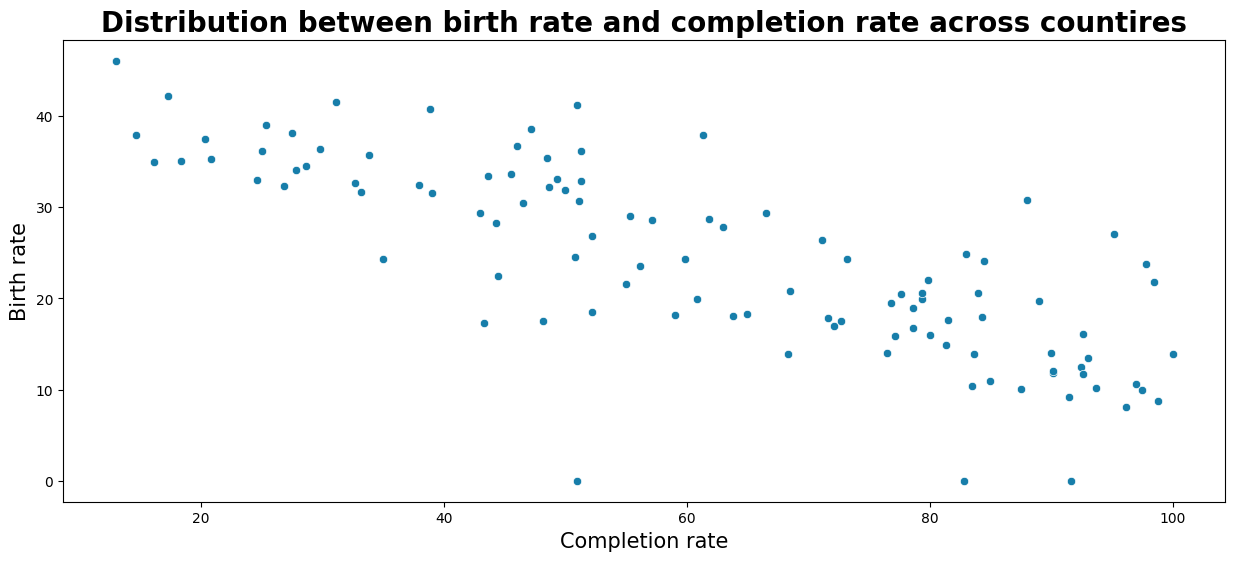

In [22]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_birthrate_completion, x = 'Completion_Rate', y = 'Birth_Rate', color='#177EAA')
plt.title('Distribution between birth rate and completion rate across countires', fontweight = '600', fontsize = 20)
plt.xlabel('Completion rate' , fontweight = '500', fontsize = 15)
plt.ylabel('Birth rate',  fontweight = '500', fontsize = 15);

# **How do literacy rates among youth aged 15-24 vary between countries and genders?**

## **Filter dataframe to literacy rates**

In [90]:
df_lit = df[['Countries','Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female']]
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None
df_lit['Continent'] = df_lit['Countries'].apply(country_to_continent);

C:\Users\PCPV\AppData\Local\Temp\ipykernel_4480\2047511066.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lit['Continent'] = df_lit['Countries'].apply(country_to_continent);


In [91]:
lieracy = df_lit.groupby('Continent').agg({'Youth_15_24_Literacy_Rate_Male': 'mean', 'Youth_15_24_Literacy_Rate_Female': 'mean'}).reset_index()
lieracy.rename(columns={'Youth_15_24_Literacy_Rate_Male': 'Male_15_24','Youth_15_24_Literacy_Rate_Female': 'Female_15_24' }, inplace=True)

## **Literacy rate between man and women in all continents**

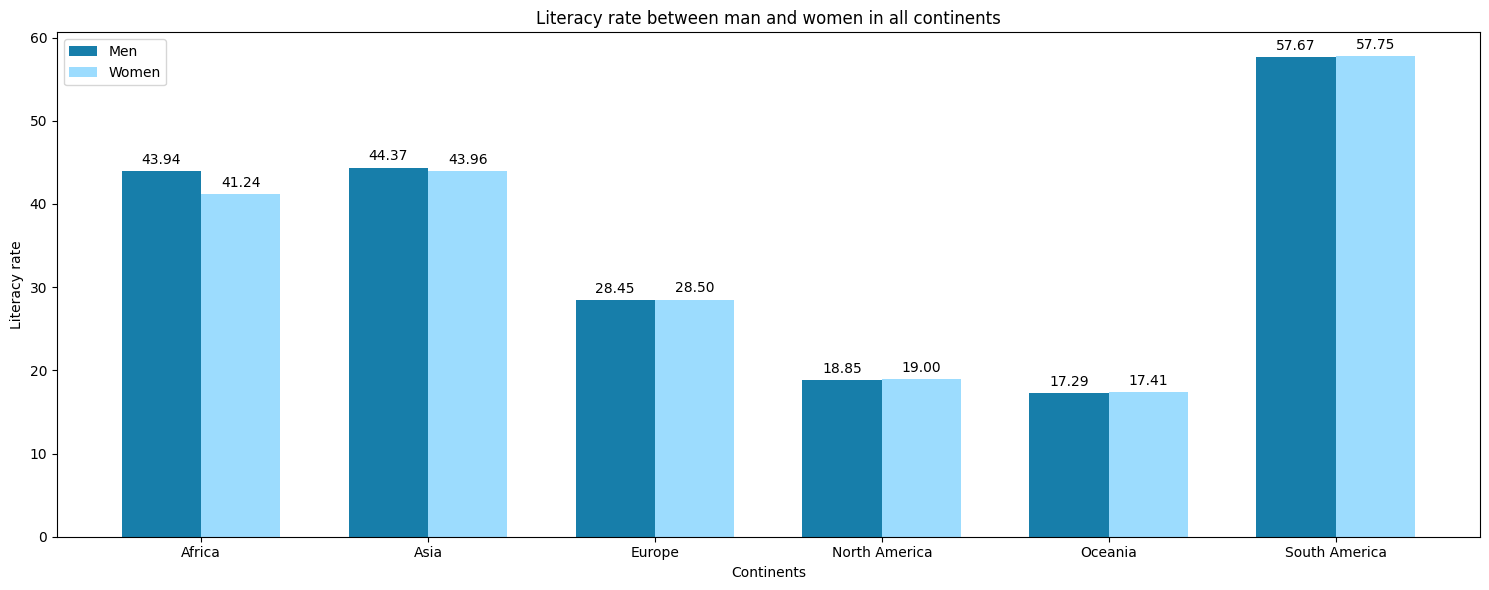

In [28]:
x = np.arange(len(lieracy['Continent']))  # Vị trí của các nhãn trên trục x
width = 0.35  # Độ rộng của các cột

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width/2, lieracy['Male_15_24'], width, label='Men', color='#177EAA')
rects2 = ax.bar(x + width/2, lieracy['Female_15_24'], width, label='Women', color='#9CDCFE')

# Thêm một số chú thích
ax.set_xlabel('Continents')
ax.set_ylabel('Literacy rate')
ax.set_title('Literacy rate between man and women in all continents')
ax.set_xticks(x)
ax.set_xticklabels(lieracy['Continent'])
ax.legend()

# Thêm giá trị trên đầu các cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# **How do reading and math proficiency levels differ across countries at various education levels?**

## **Filter dataframe to reading and math proficiency**

In [92]:
df_proficency = df[['Countries','Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math']]

## **Mapping countries to continents**

In [42]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None
df_proficency['Continent'] = df_proficency['Countries'].apply(country_to_continent);

C:\Users\PCPV\AppData\Local\Temp\ipykernel_4480\1322406651.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficency['Continent'] = df_proficency['Countries'].apply(country_to_continent);


## **Find the mean of proficiency in every level**

In [43]:
df_proficency['Grade_2_3'] = (df_proficency['Grade_2_3_Proficiency_Math'] + df_proficency['Grade_2_3_Proficiency_Reading']) /2
df_proficency['Primary'] = (df_proficency['Primary_End_Proficiency_Reading'] + df_proficency['Primary_End_Proficiency_Math']) /2
df_proficency['Lower_Secondary'] = (df_proficency['Lower_Secondary_End_Proficiency_Reading'] + df_proficency['Lower_Secondary_End_Proficiency_Math']) /2

df_proficency.drop(columns=['Grade_2_3_Proficiency_Reading',
       'Grade_2_3_Proficiency_Math', 'Primary_End_Proficiency_Reading',
       'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math'], inplace=True);

C:\Users\PCPV\AppData\Local\Temp\ipykernel_4480\2223544850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficency['Grade_2_3'] = (df_proficency['Grade_2_3_Proficiency_Math'] + df_proficency['Grade_2_3_Proficiency_Reading']) /2
C:\Users\PCPV\AppData\Local\Temp\ipykernel_4480\2223544850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proficency['Primary'] = (df_proficency['Primary_End_Proficiency_Reading'] + df_proficency['Primary_End_Proficiency_Math']) /2
C:\Users\PCPV\AppData\Local\Temp\i

In [46]:
proficiency = df_proficency.groupby('Continent').agg({
        'Grade_2_3': 'mean',
        'Primary': 'mean',
        'Lower_Secondary': 'mean',
    }).reset_index()

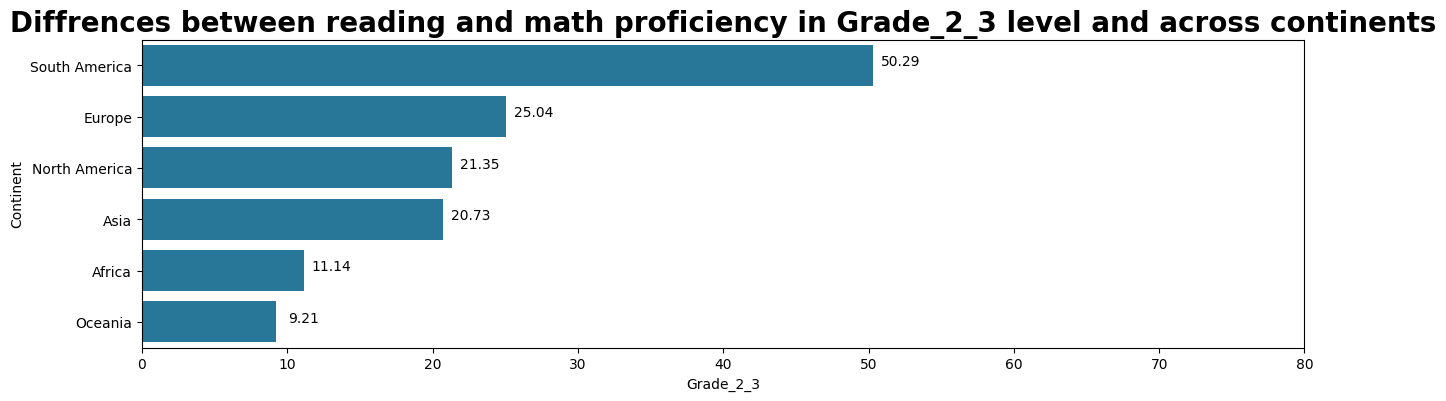

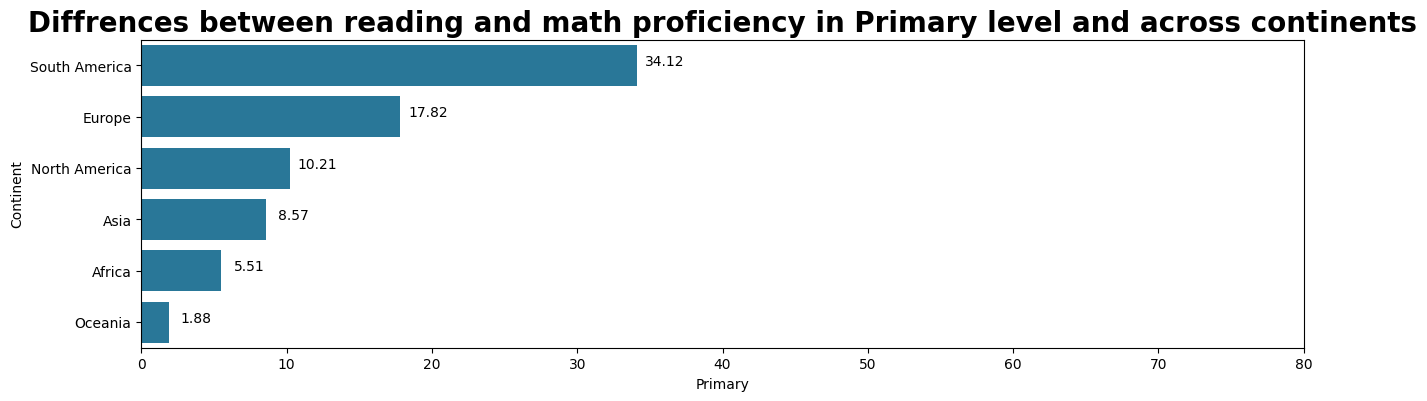

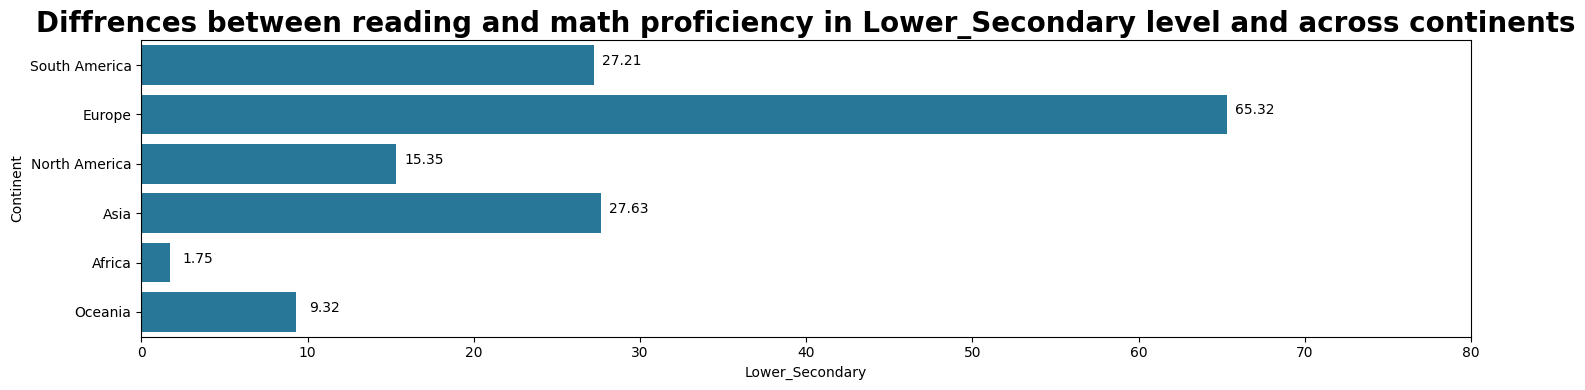

In [67]:
proficiency = proficiency.sort_values(['Grade_2_3','Primary', 'Lower_Secondary'], ascending=False)
for i in proficiency.columns[1:]:
    plt.figure(figsize=(15,4))
    sns.barplot(proficiency, y = 'Continent', x=i, color='#177EAA')
    plt.xlim(0, 80)
    for x, c in zip(proficiency['Continent'], proficiency[i]):
        label = f'{c:.2f}'
        plt.annotate(label, (c,x), textcoords="offset points", xytext=(20,0), ha='center')
        plt.title(f'Diffrences between reading and math proficiency in {i} level and across continents', fontweight = '600', fontsize = 20)
plt.tight_layout()

# **What is the relationship between gross primary education enrollment and gross tertiary education enrollment?**

## **Filter dataframe to reading and math proficiency**

In [77]:
df_erollemnt = df[['Countries', 'Gross_Primary_Education_Enrollment' , 'Gross_Tertiary_Education_Enrollment']]
df_erollemnt = df_erollemnt.groupby('Countries').agg({
    'Gross_Primary_Education_Enrollment': 'mean',
    'Gross_Tertiary_Education_Enrollment': 'mean'
}).reset_index()

Text(0.5, 1.0, 'Relationship of GPEE and GTEE')

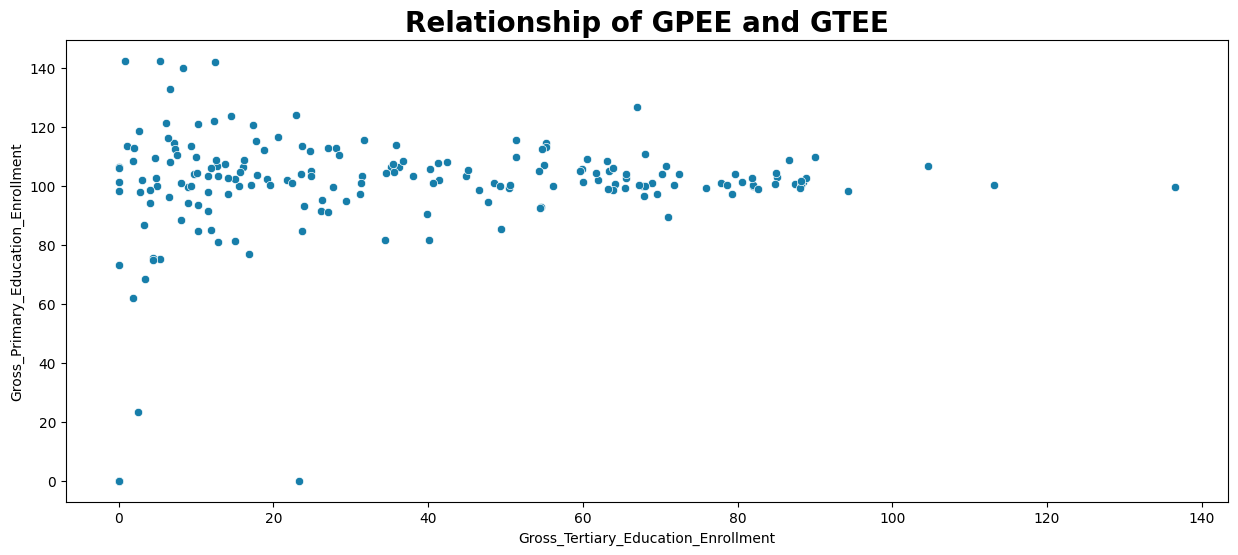

In [83]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_erollemnt, x = 'Gross_Tertiary_Education_Enrollment', y = 'Gross_Primary_Education_Enrollment', color='#177EAA')
plt.title('Relationship of GPEE and GTEE', fontweight = '600', fontsize = 20)